In [1]:
import shap
import pickle
import pandas as pd

In [2]:
with open("S01_shap_calc.pkl", "rb") as f:
    data = pickle.load(f)
    shaps = data["shaps"]
    infos = data["infos"]

In [3]:
pd.DataFrame.from_dict(infos)

,model,model_params,test_size,random_state
0,DTR,"{'criterion': 'squared_error', 'splitter': 'ra...",0.3,4
1,EN,"{'alpha': 0.03388469103413104, 'l1_ratio': 0.4...",0.3,5
2,GBR,"{'n_estimators': 134, 'learning_rate': 0.02748...",0.3,4
3,KNR,"{'n_neighbors': 36, 'weights': 'distance', 'al...",0.3,5
4,RFR,"{'n_estimators': 60, 'max_depth': 5, 'min_samp...",0.3,5
5,SVR,"{'kernel': 'linear', 'C': 0.012708183589980318...",0.3,5
6,XGBR,"{'n_estimators': 229, 'max_depth': 8, 'learnin...",0.3,5


In [4]:
idx = 6
shap_values = shaps[idx]["shap_values"]
model = shaps[idx]["model"]

print(f"Model: {model}")

Model: XGBR


In [5]:
# List all attributes of object
df_value = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)
df_value

,D,Fx__dwell__ar_coefficient__coeff_0__k_10,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11","Fx__weld__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Fx__weld__fft_coefficient__attr_""abs""__coeff_5",Fx_location,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59","Fy__dwell__fft_coefficient__attr_""real""__coeff_71","Fy__weld__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0",Fy__weld__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"Fz__dwell__fft_coefficient__attr_""angle""__coeff_4","Fz__dwell__fft_coefficient__attr_""real""__coeff_4","Fz__weld__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""var""","Fz__weld__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4",Fz_location,"Mz__dwell__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""","Mz__dwell__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""",R,W,position
0,-0.001518,0.002583,-0.031896,-0.004518,0.001972,0.022523,-0.025665,0.027265,-0.008075,-0.023825,-0.014662,-0.000146,0.004698,-0.004674,-0.029177,-0.007134,-0.000896,-0.061803,-0.004453,-0.562224
1,-0.001015,-0.006163,-0.082930,-0.019820,0.003428,-0.058458,-0.019373,0.024900,-0.014307,-0.066106,-0.022727,-0.000959,0.006733,-0.094465,0.008527,-0.009895,-0.000896,-0.068301,-0.011275,0.270006
2,-0.004429,0.006704,0.020351,0.007238,0.005905,0.058854,0.000812,-0.004210,0.019078,0.067344,-0.016462,0.001211,0.001855,0.023601,-0.015877,0.016069,-0.000896,-0.082451,0.003232,0.414356
3,-0.000979,-0.005958,0.023679,0.011447,0.004704,-0.036612,-0.019649,0.002093,0.016390,0.025997,-0.010662,0.000110,-0.052227,0.013480,0.003287,-0.000964,-0.000896,-0.063689,-0.017754,0.346261
4,-0.001649,-0.020450,-0.000005,0.021213,0.004570,-0.037435,-0.005314,-0.025216,-0.011403,-0.035811,-0.015006,-0.005448,0.006453,0.007138,-0.028662,0.002501,-0.000959,0.098976,-0.008563,0.341107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.007734,-0.007243,0.019295,0.003981,0.006683,0.049694,0.084717,-0.008783,0.018975,-0.056209,-0.014125,0.002114,0.003761,0.023914,0.044972,0.001324,-0.000896,-0.075274,-0.001301,0.423543
374,0.001437,-0.020166,0.011249,-0.040960,0.003299,-0.041283,-0.017234,-0.018117,-0.005954,-0.014468,0.009252,0.017718,0.008682,-0.049621,-0.005151,0.001476,-0.000849,0.092479,-0.004149,0.026635
375,0.007879,-0.021240,0.021850,0.000199,0.006691,0.044108,0.046965,-0.020818,-0.010162,0.014788,-0.001862,-0.005267,0.025209,0.006578,-0.027010,0.007272,-0.000896,0.090207,-0.005384,0.410088
376,0.002189,-0.012181,0.019051,0.003204,-0.017434,-0.035252,-0.008455,-0.011957,0.017850,0.002321,-0.038105,0.000967,0.004021,0.003023,-0.027960,0.001887,-0.000896,-0.064671,-0.008233,0.349801


In [6]:
df_value.loc[0,:].abs().sort_values(ascending=False)

position                                                                 0.562224
R                                                                        0.061803
Fx__dwell__fft_coefficient__attr_"abs"__coeff_11                         0.031896
Fz_location                                                              0.029177
Fy__dwell__fft_coefficient__attr_"real"__coeff_71                        0.027265
Fy__dwell__fft_coefficient__attr_"abs"__coeff_59                         0.025665
Fy__weld__energy_ratio_by_chunks__num_segments_10__segment_focus_5       0.023825
Fx_location                                                              0.022523
Fz__dwell__fft_coefficient__attr_"angle"__coeff_4                        0.014662
Fy__weld__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0     0.008075
Mz__dwell__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"         0.007134
Fz__weld__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"      0.004698
Fz__weld__change

In [7]:
df_data = pd.DataFrame(shap_values.data, columns=shap_values.feature_names)
df_data

,D,Fx__dwell__ar_coefficient__coeff_0__k_10,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11","Fx__weld__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Fx__weld__fft_coefficient__attr_""abs""__coeff_5",Fx_location,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59","Fy__dwell__fft_coefficient__attr_""real""__coeff_71","Fy__weld__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0",Fy__weld__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"Fz__dwell__fft_coefficient__attr_""angle""__coeff_4","Fz__dwell__fft_coefficient__attr_""real""__coeff_4","Fz__weld__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""var""","Fz__weld__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4",Fz_location,"Mz__dwell__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""","Mz__dwell__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""",R,W,position
0,0.023403,-0.178905,1.034285,0.169437,0.491192,0.736407,-0.544278,-0.688870,0.142111,1.584542,-0.008825,-0.029051,0.002198,2.932004,0.460581,-0.523554,-0.683907,1.248345,-1.224745,1.518433
1,0.023403,-0.178905,1.034285,0.169437,0.491192,-1.448297,-0.544278,-0.688870,0.142111,1.584542,-0.008825,-0.029051,0.002198,2.932004,-1.944154,-0.523554,-0.683907,1.248345,-1.224745,-1.491827
2,0.023403,-0.189349,-0.507597,-0.999019,0.443844,0.731641,-0.325340,-0.200139,-0.755971,-1.439309,-0.270738,-0.475284,0.131901,0.597043,0.432817,-0.523730,-0.885481,1.248345,0.000000,0.013303
3,-1.212254,-0.104272,-0.529317,-0.650452,-0.569099,-0.074444,-0.230084,-0.447835,-1.364762,-0.596125,-0.200568,-0.587689,1.007966,-0.000526,-0.049047,-0.160471,0.563046,1.248345,-1.224745,-0.990117
4,-1.212254,0.468670,0.164315,0.906832,1.086008,-0.148432,0.486338,0.278050,-0.049326,0.183882,0.105229,-0.503278,0.310537,-0.128887,-0.307792,-0.523772,-1.164743,-1.229573,-1.224745,-0.990117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1.259059,-0.087918,-0.588111,-0.468247,-0.832704,0.606998,-0.675085,-0.012715,-0.250466,2.007668,-0.309076,-0.064766,0.357115,0.478484,1.005632,0.240194,0.753749,1.248345,0.000000,0.013303
374,1.259059,0.701091,-0.292519,2.378782,-0.159579,-1.435627,-0.017544,0.802437,1.104181,0.681439,1.333305,3.950257,-1.051314,1.843918,-0.049275,-0.523777,-1.459118,-1.229573,0.000000,0.515013
375,1.259059,0.613934,-0.623637,1.073489,-0.613443,0.711122,-0.595071,-0.040430,1.109917,-0.384467,-0.075673,0.171665,-1.134996,-0.337817,-0.915026,-0.509213,-0.065213,-1.229573,-1.224745,-0.990117
376,1.259059,0.084229,-0.360778,-1.559452,-1.545413,0.070312,-0.311039,0.237599,-1.119591,-0.294027,-1.393925,-0.948896,0.012719,-0.202655,0.476503,0.140700,0.715619,0.009386,-1.224745,-0.990117


In [8]:
shap_values.feature_names

['D',
 'Fx__dwell__ar_coefficient__coeff_0__k_10',
 'Fx__dwell__fft_coefficient__attr_"abs"__coeff_11',
 'Fx__weld__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2',
 'Fx__weld__fft_coefficient__attr_"abs"__coeff_5',
 'Fx_location',
 'Fy__dwell__fft_coefficient__attr_"abs"__coeff_59',
 'Fy__dwell__fft_coefficient__attr_"real"__coeff_71',
 'Fy__weld__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0',
 'Fy__weld__energy_ratio_by_chunks__num_segments_10__segment_focus_5',
 'Fz__dwell__fft_coefficient__attr_"angle"__coeff_4',
 'Fz__dwell__fft_coefficient__attr_"real"__coeff_4',
 'Fz__weld__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"',
 'Fz__weld__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
 'Fz_location',
 'Mz__dwell__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"',
 'Mz__dwell__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"',
 'R',
 'W',
 'position']

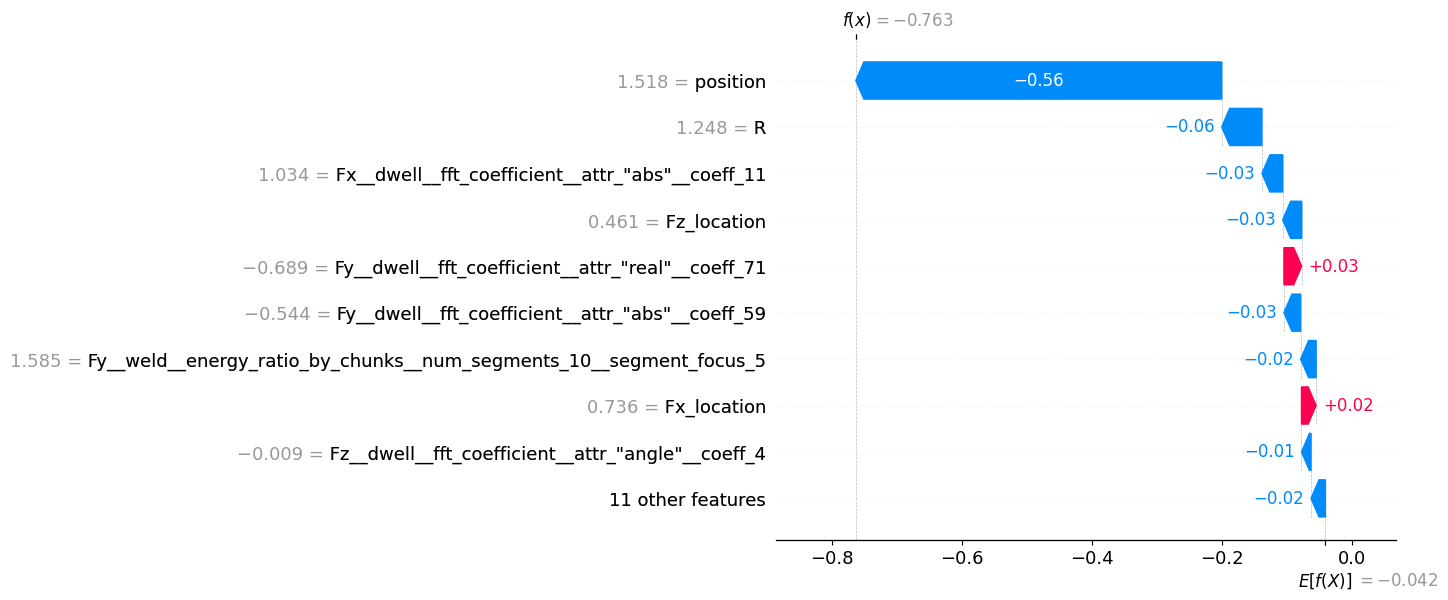

In [9]:
# Plot SHAP values for the first instance
shap.plots.waterfall(shap_values[0])

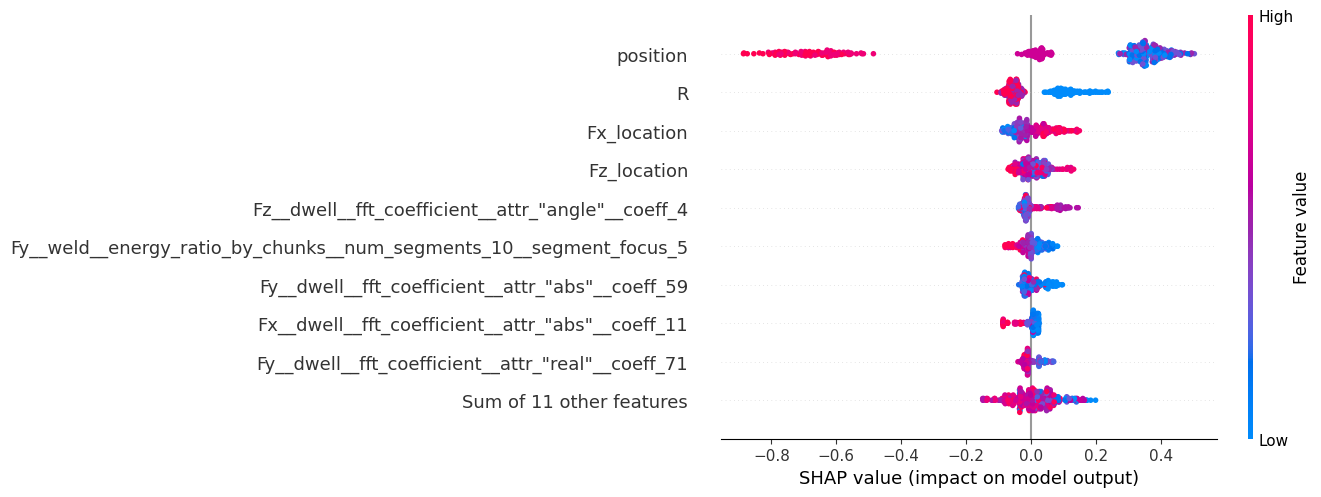

In [10]:
# Plot SHAP summary plot
shap.plots.beeswarm(shap_values)

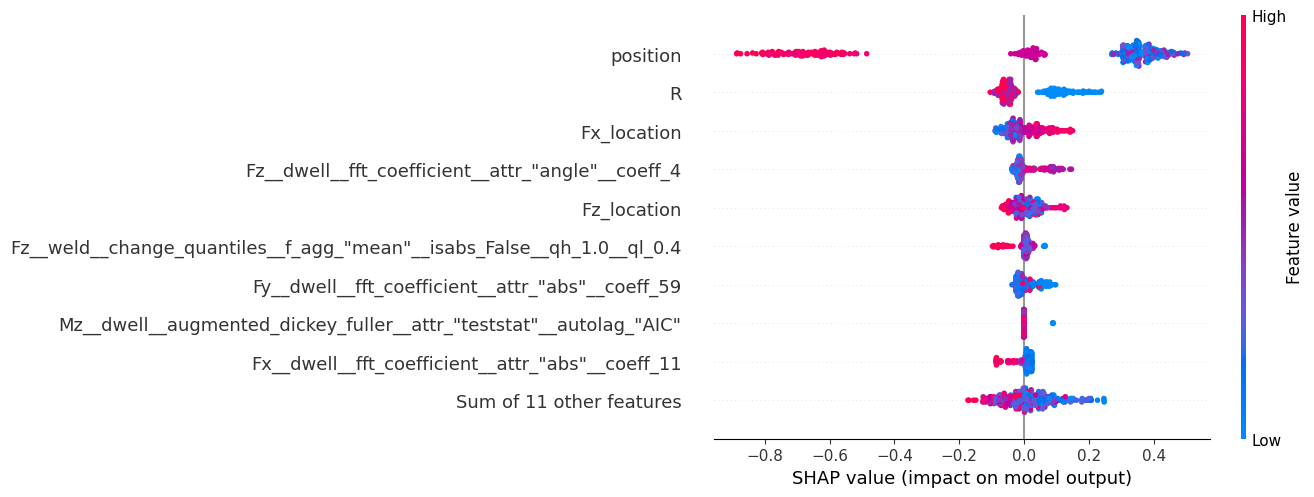

In [11]:
# Plot SHAP summary plot with features ordered by importance
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

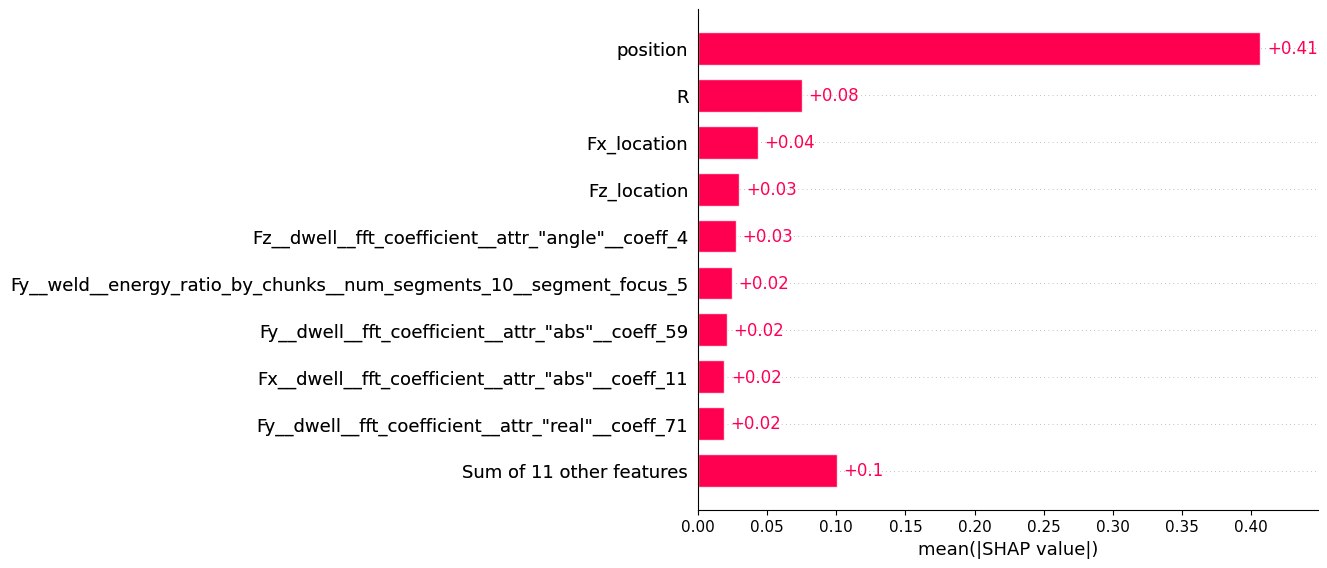

In [12]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

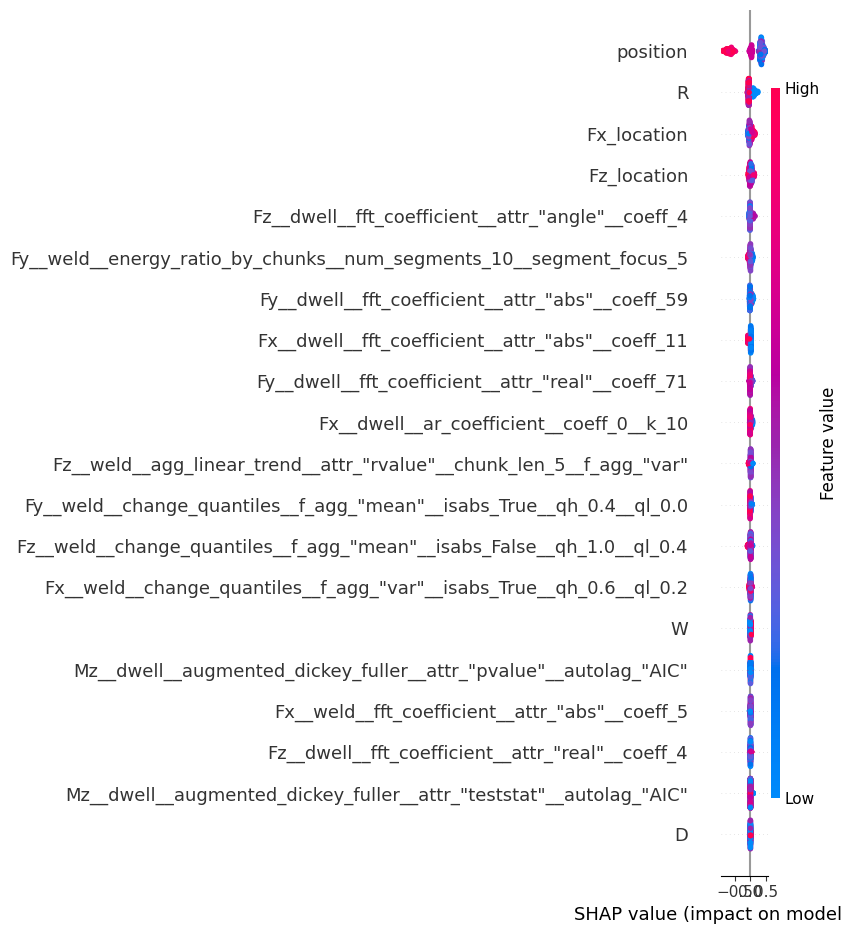

In [13]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

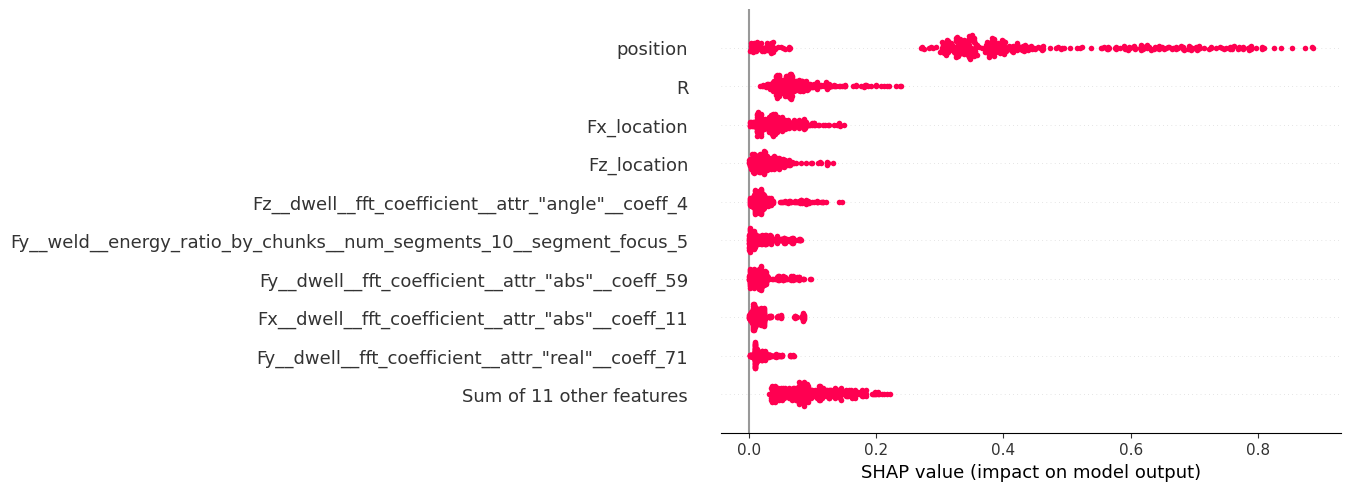

In [14]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

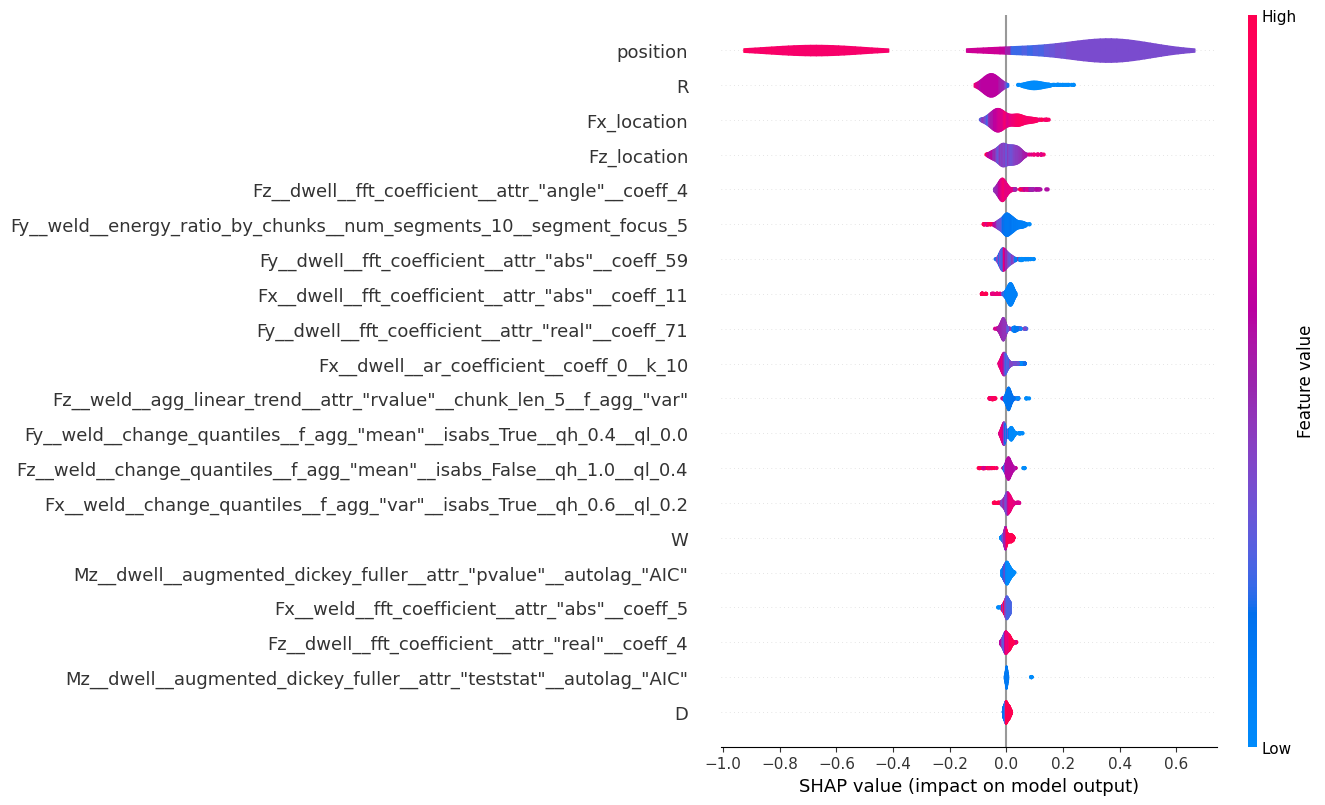

In [15]:
shap.plots.violin(shap_values)

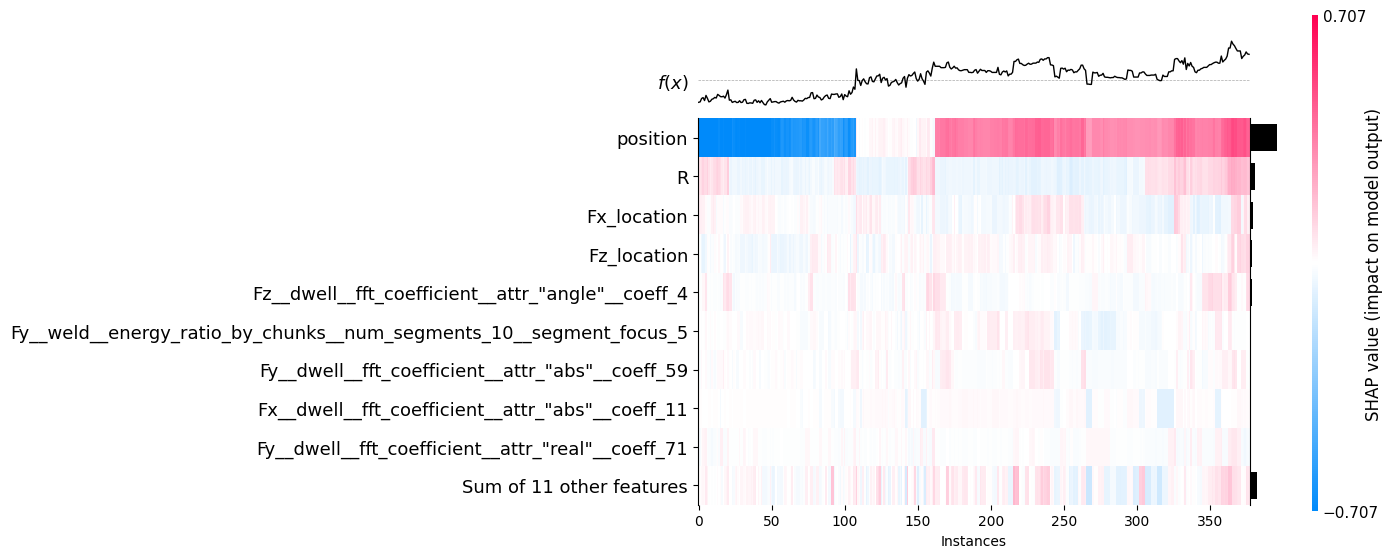

<Axes: xlabel='Instances'>

In [16]:
shap.plots.heatmap(shap_values)

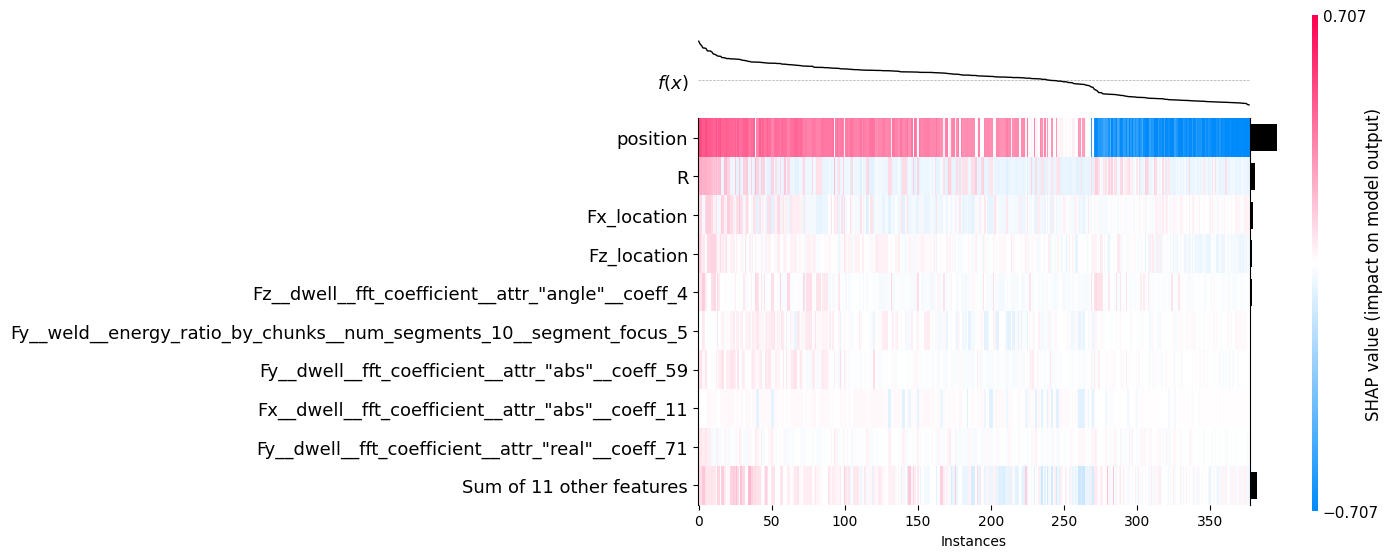

<Axes: xlabel='Instances'>

In [17]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

In [18]:
import numpy as np

feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
19,position,0.406682
17,R,0.075040
5,Fx_location,0.043160
14,Fz_location,0.029778
10,"Fz__dwell__fft_coefficient__attr_""angle""__coeff_4",0.027541
9,Fy__weld__energy_ratio_by_chunks__num_segments...,0.024278
6,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59",0.020735
2,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11",0.018944
7,"Fy__dwell__fft_coefficient__attr_""real""__coeff_71",0.018721
1,Fx__dwell__ar_coefficient__coeff_0__k_10,0.016134


In [19]:
ranking = shap_importance.rename(columns={"col_name": "feature", "feature_importance_vals": "value"})
ranking["measure"] = "SHAP_importance"
ranking["rank"] = np.arange(1, len(ranking) + 1)
ranking

,feature,value,measure,rank
19,position,0.406682,SHAP_importance,1
17,R,0.075040,SHAP_importance,2
5,Fx_location,0.043160,SHAP_importance,3
14,Fz_location,0.029778,SHAP_importance,4
10,"Fz__dwell__fft_coefficient__attr_""angle""__coeff_4",0.027541,SHAP_importance,5
9,Fy__weld__energy_ratio_by_chunks__num_segments...,0.024278,SHAP_importance,6
6,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59",0.020735,SHAP_importance,7
2,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11",0.018944,SHAP_importance,8
7,"Fy__dwell__fft_coefficient__attr_""real""__coeff_71",0.018721,SHAP_importance,9
1,Fx__dwell__ar_coefficient__coeff_0__k_10,0.016134,SHAP_importance,10


In [20]:
ranking.to_excel("S02.xlsx", index=False)